# CV Workshop
## Low-level Basics

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Gray scale image

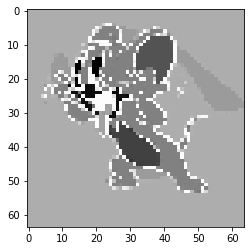

In [42]:
img = cv2.imread('./toy_example.jpg')
img = cv2.resize(img, (64,64))
img_gray = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
# Neglect the above part (for preparing a 64*64 grayscale image)

plt.imshow(img_gray, cmap='Greys')

In [43]:
img_bar = img_gray[30:32].copy()
img_bar[0,0] = 0

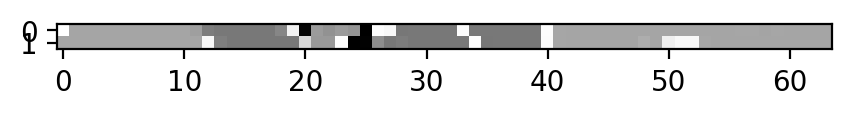

In [44]:
plt.figure(figsize=(5,5), dpi=200)
plt.imshow(img_bar, cmap='Greys')

### RGB Channels

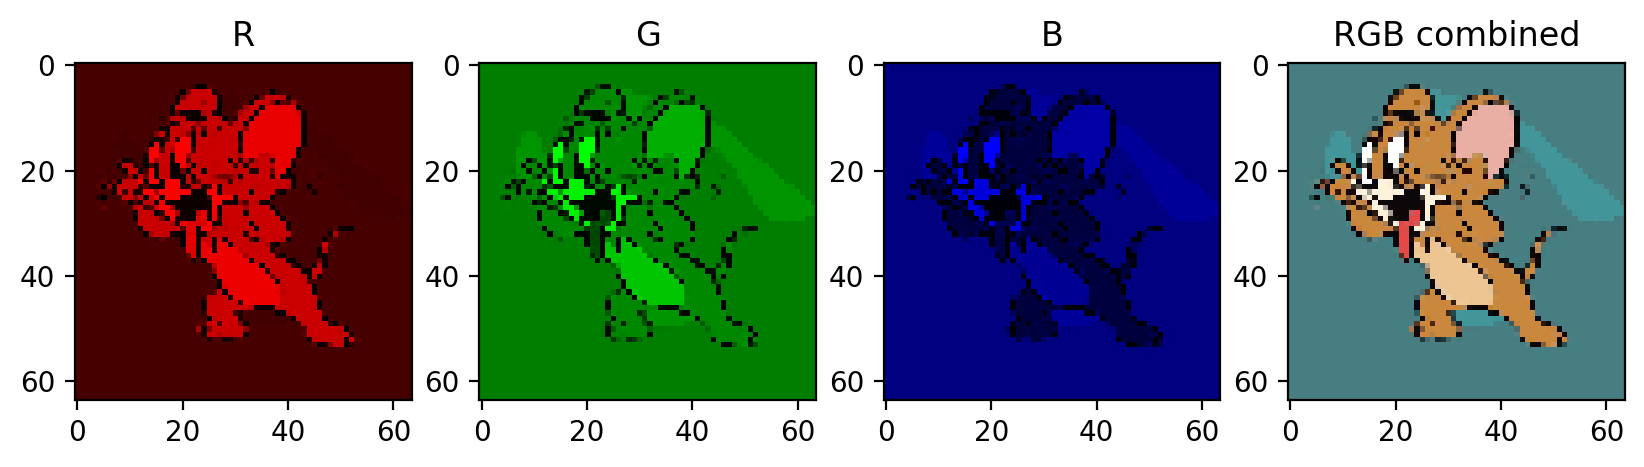

In [45]:
img_B, img_G, img_R = img.copy(), img.copy(), img.copy()
img_B[:,:,1] *= 0
img_B[:,:,2] *= 0
img_G[:,:,0] *= 0
img_G[:,:,2] *= 0
img_R[:,:,0] *= 0
img_R[:,:,1] *= 0


# convert BGR to RGB for imshow
img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
img_G = cv2.cvtColor(img_G, cv2.COLOR_BGR2RGB)
img_R = cv2.cvtColor(img_R, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5), dpi=200)
ax = plt.subplot(141)
ax.set_title('R')
plt.imshow(img_R)
ax = plt.subplot(142)
ax.set_title('G')
plt.imshow(img_G)
ax = plt.subplot(143)
ax.set_title('B')
plt.imshow(img_B)
ax = plt.subplot(144)
ax.set_title('RGB combined')
plt.imshow(img_disp)

### Convolution

In [46]:
def convolution(patch, filter):
    return (patch*filter).sum()

### Gaussian Blur

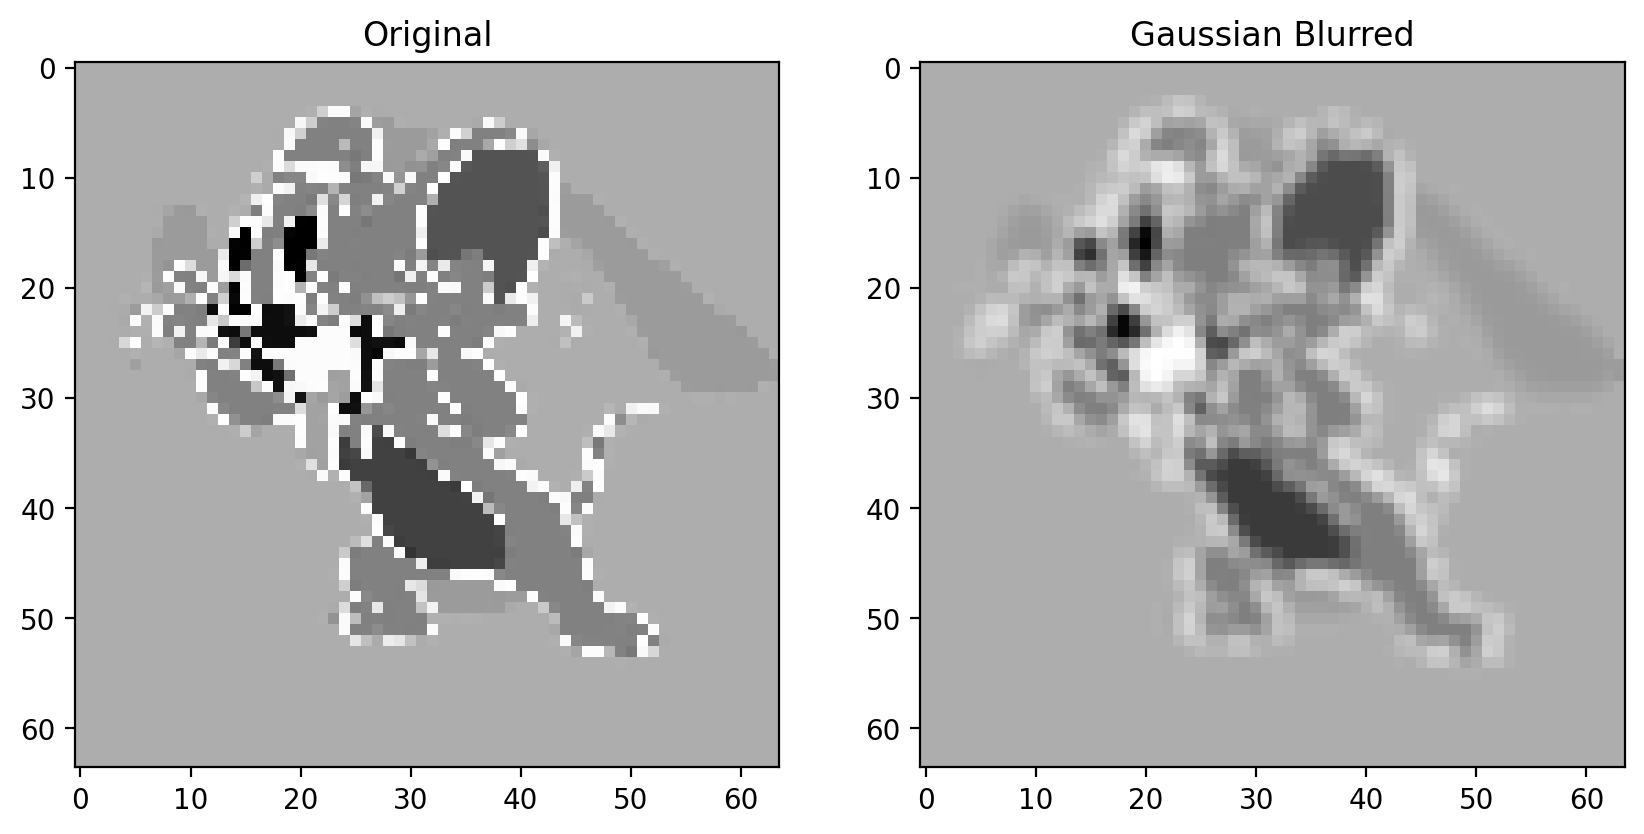

In [47]:
img_gauss = img_gray.copy()
gauss_kernel = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=np.float)/16
for h in range(1, img_gauss.shape[0]-1, 1):
    for w in range(1, img_gauss.shape[1]-1, 1):
        img_gauss[h, w] = convolution(img_gray[h-1:h+2, w-1:w+2], gauss_kernel)

plt.figure(figsize=(10,5), dpi=200)
ax = plt.subplot(121)
ax.set_title('Original')
plt.imshow(img_gray, cmap='Greys')
ax = plt.subplot(122)
ax.set_title('Gaussian Blurred')
plt.imshow(img_gauss, cmap='Greys')

### Denoise with Gaussian Filters

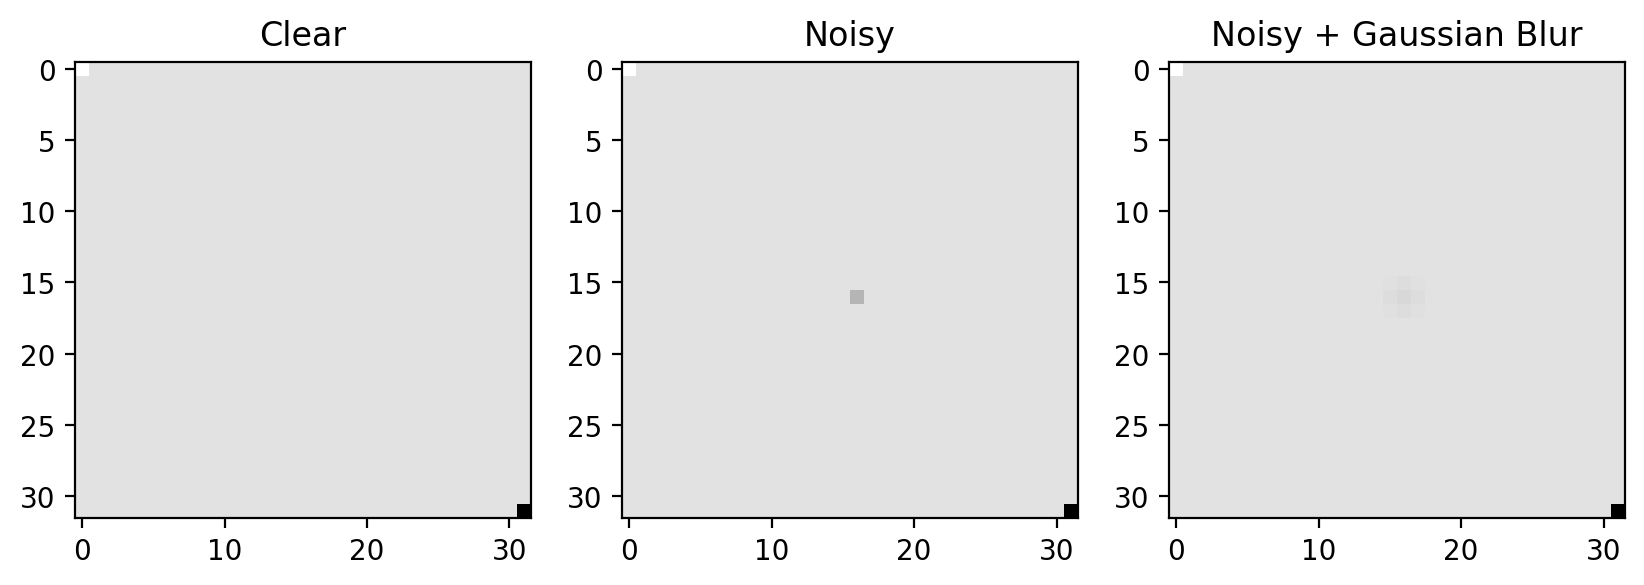

In [58]:
# a clear, purely-write grayscale image, size: 32*32
clear_pic = np.ones((32, 32), dtype=np.float32)*0.2

# a noisy image
noisy_pic = clear_pic.copy()
noisy_pic[16, 16] += 0.2

# a gaussian blurred noisy image
noisy_gaussian = noisy_pic.copy()
for h in range(1, noisy_gaussian.shape[0]-1, 1):
    for w in range(1, noisy_gaussian.shape[1]-1, 1):
        noisy_gaussian[h, w] = convolution(noisy_pic[h-1:h+2, w-1:w+2], gauss_kernel)

plt.figure(figsize=(10,5),dpi=200)
ax = plt.subplot(131)
ax.set_title('Clear')
clear_pic[0,0], clear_pic[-1,-1] = 0.0, 1.0
plt.imshow(clear_pic*256, cmap='Greys')
ax = plt.subplot(132)
ax.set_title('Noisy')
noisy_pic[0,0], noisy_pic[-1,-1] = 0.0, 1.0
plt.imshow(noisy_pic*256, cmap='Greys')
ax = plt.subplot(133)
ax.set_title('Noisy + Gaussian Blur')
noisy_gaussian[0,0], noisy_gaussian[-1,-1] = 0.0, 1.0
plt.imshow(noisy_gaussian*256, cmap='Greys')